# 2021-11-23

Sprendimus siųskite (vardas_pavarde_k3.ipynb; ipynb ir pdf/html formatais)
iki 2021-11-28 23:55 į avoicikas@gmail.com

Įveskite savo vardą ir pavardę

## Viktorija Povilionytė, III kolis

Vertinimas

- Komentarai (veiksmų planas ir paaiškinimas)
- Sprendimo kodas, pritaikyti algoritmai
- Rezultatas ir jo pateikimas

---
>> **UŽDUOTIS**
>>
>> Straipsnio duomenų ir rezultatų analizė.
>>
>> - Atkartokite straipsnyje raudonai pažymėtas dalis.
>>
>> Straipsnis: Shao2017_Correlation_of_choroidal_thickness.pdf
>>
>> Duomenys: Shao2017_Correlation_of_choroidal_thickness.csv
>>
>> Trumpai:
>>
>> Analizė gyslainės storio (choroidal thickness CT)
>>
>> - koreliacija ir tiesinė regresija gyslainės storio su laužimo paklaida (refractive error RE), ašies ilgiu (axial length AL) ir amžiumi (AGE)
>> - gyslainės storis matuotas 5 vietose 1 mm žingsniais (T1 T2 SF N1 N2)
>> su find funkcija pasidaryti, kad rastu viena female ir tt
>>
---

## DUOMENYS

Sutvarkyti duomenys pateikti faile Shao2017_Correlation_of_choroidal_thickness.csv

- Sex   - lytis
- Age   - amžius
- l/r   - kairės ir dešinės akies matavimai
- RE    - laužimo paklaida (refractive error)
- SE    - išvestinis matas akies apvalumo (spherical equivalence)
- CV    - koreguotas regėjimo aštrumas (corrected visual acuity)
- AL    - ašies ilgis (axial length)
- CT    - storio matavimai ties T1 T2 SF N1 ir N2

---
>> **UŽDUOTIS**
>>
>> 1. Duomenų aprašymas
>>
>> a) Atkartoti lentelę nr. 1 (Table 1). parašyt tekstą,kur yra skaičiai juos reikia paskaičiuoti (kai printini skaičiai turi būti f string). amžius dvigubas, nes vienai akiai ir antroj akiai yra tas pats amžius
>>
>> b) Atkartoti skyrelio 'Results' pažymėtas dalis.
>>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
import scipy.stats as stats
sns.set()
plt.style.use([{
    "figure.figsize": (10, 5),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
}, 'seaborn-poster'])
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

## Eiga
- Pradžioje reikia importuoti duomenis.
- Norint importuoti, pirma susirandam, kur yra mūsų failas:
     - `os.path.expanduser('~')` naudojame, kad patektume į namų direktoriją.
     - `os.path.join` padeda sukurti kelią iki mūsų failo.
- Norint atidaryti failą naudojame pandas pakuotę, `pd.read_csv()`.
- `csv` rodo, kad mūsų failo tipas yra 'coma separated values'.

In [3]:
direktorija = os.path.expanduser("~")
failas = os.path.join(direktorija,'Desktop','programavimas','biod2021','exam','K3','Shao2017_Correlation_of_choroidal_thickness.csv')
failas1 = pd.read_csv(failas)
failas1

Sex  Age l/r    RE     SE   CV     AL   T2   T1   SF   N1   N2
0      male    8  od  0.00  0.625  1.0  23.46  289  309  314  248  203
1      male    8  os  0.00  0.750  1.0  23.53  274  287  289  277  207
2    female   13  od -3.50 -4.250  0.8  24.38  191  217  258  257  239
3    female   13  os -4.00 -5.000  0.8  25.11  186  216  238  230  211
4      male   10  od -0.25  0.000  1.0  23.33  339  332  326  281  236
..      ...  ...  ..   ...    ...  ...    ...  ...  ...  ...  ...  ...
96   female    7  os  0.00  0.250  1.0  22.46  334  323  330  308  230
97   female    5  od -1.50 -0.625  0.8  22.56  348  322  354  318  229
98   female    5  os -0.50  0.250  0.8  22.29  321  393  389  347  235
99   female   10  od -2.75 -2.750  1.0  24.65  205  206  188  127  101
100  female   10  os -2.50 -2.750  1.0  24.75  215  197  179  145  109

[101 rows x 12 columns]

In [4]:
table = pd.DataFrame({'Measurement location': ['2mm temporal to fovea (T2)',
                       '1mm temporal to fovea (T1)',
                       'subfovea (SF)',
                       '1mm nasal to fovea (N1)',
                       '2mm nasal to fovea (N2)']})
table

Measurement location
0  2mm temporal to fovea (T2)
1  1mm temporal to fovea (T1)
2               subfovea (SF)
3     1mm nasal to fovea (N1)
4     2mm nasal to fovea (N2)

In [5]:
T2 = table['CT (Mean±SD)'] = np.mean(failas1['T2']) #naudojant `np.mean` apskaičiuojam vidurkį
T1 = table['CT (Mean±SD)'] = np.mean(failas1['T1']) #nurodome kokius duomenis iš lentelės reikia vidurkinti
SF = table['CT (Mean±SD)'] = np.mean(failas1['SF'])
N1 = table['CT (Mean±SD)'] = np.mean(failas1['N1'])
N2 = table['CT (Mean±SD)'] = np.mean(failas1['N2'])

sT2 = table['CT (Mean±SD)'] = np.std(failas1['T2']) #naudojant `np.std` apskaięiuojam standartinį nuokrypį
sT1 = table['CT (Mean±SD)'] = np.std(failas1['T1']) #nurodome, kurių duomenų skaičiuojamas standartinis nuokrypis 
sSF = table['CT (Mean±SD)'] = np.std(failas1['SF'])
sN1 = table['CT (Mean±SD)'] = np.std(failas1['N1'])
sN2 = table['CT (Mean±SD)'] = np.std(failas1['N2'])



In [6]:
t2 = str(round(T2,2))+'$\pm$' +str(round(sT2,2)) #pasiverčiame duomenis į `string`, kad galėtume apvalinti 
t1 = str(round(T1,2))+'$\pm$' +str(round(sT1,2)) #Plius minus ženklo įterpimui naudojam sudėtį, prie string verčių pridedame ženklą
sf = str(round(SF,2))+'$\pm$' +str(round(sSF,2)) #norint gauti plius minus naudojame `$\pm$`
n1 = str(round(N1,2))+'$\pm$' +str(round(sN1,2))
n2 = str(round(N2,2))+'$\pm$' +str(round(sN2,2))


In [7]:
table = pd.DataFrame({'Measurement location': ['2mm temporal to fovea (T2)', #Sukuriame naują lentelę, nurodome stulpelių ir eilučių pavadinimus
                       '1mm temporal to fovea (T1)',
                       'subfovea (SF)',
                       '1mm nasal to fovea (N1)',
                       '2mm nasal to fovea (N2)']})
table['CT (Mean±SD)']=[t2,   #prie naujai sukurtos lentelės pridedame vidurkio ir standartinio nuokrypio vertes
                      t1,
                      sf,
                      n1,
                      n2]
table.set_index('Measurement location')

CT (Mean±SD)
Measurement location                        
2mm temporal to fovea (T2)  295.77$\pm$57.88
1mm temporal to fovea (T1)  291.34$\pm$62.42
subfovea (SF)                286.77$\pm$70.1
1mm nasal to fovea (N1)     247.17$\pm$64.67
2mm nasal to fovea (N2)     200.78$\pm$58.72

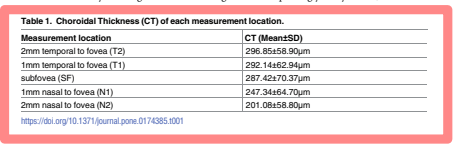

### Table 1. Choroidal Thickness (CT) of each measurement location

In [8]:
table #standartinis nuokrypis rodo kaip reikšmės yra išsibarsčiusios aplink vidurkį


Measurement location      CT (Mean±SD)
0  2mm temporal to fovea (T2)  295.77$\pm$57.88
1  1mm temporal to fovea (T1)  291.34$\pm$62.42
2               subfovea (SF)   286.77$\pm$70.1
3     1mm nasal to fovea (N1)  247.17$\pm$64.67
4     2mm nasal to fovea (N2)  200.78$\pm$58.72

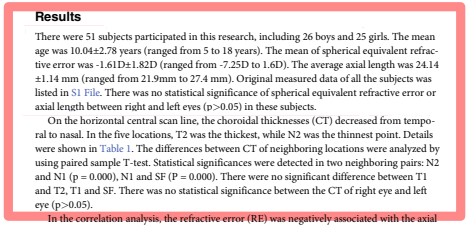

In [10]:
failas1

Sex  Age l/r    RE     SE   CV     AL   T2   T1   SF   N1   N2
0      male    8  od  0.00  0.625  1.0  23.46  289  309  314  248  203
1      male    8  os  0.00  0.750  1.0  23.53  274  287  289  277  207
2    female   13  od -3.50 -4.250  0.8  24.38  191  217  258  257  239
3    female   13  os -4.00 -5.000  0.8  25.11  186  216  238  230  211
4      male   10  od -0.25  0.000  1.0  23.33  339  332  326  281  236
..      ...  ...  ..   ...    ...  ...    ...  ...  ...  ...  ...  ...
96   female    7  os  0.00  0.250  1.0  22.46  334  323  330  308  230
97   female    5  od -1.50 -0.625  0.8  22.56  348  322  354  318  229
98   female    5  os -0.50  0.250  0.8  22.29  321  393  389  347  235
99   female   10  od -2.75 -2.750  1.0  24.65  205  206  188  127  101
100  female   10  os -2.50 -2.750  1.0  24.75  215  197  179  145  109

[101 rows x 12 columns]

In [11]:
fa = failas1['Sex'] #Patikriname ar visi duomenys turi po porą, nes buvo matuotos vieno žmogaus dvi akys
def checkIfnoDuplicates_1(fa):   #Galima tikrinti, tiek lyčių atžvilgiu, tiek akių (tiesiog turi būti poros)
    ''' Check if given list contains any non duplicates '''
    if len(fa) == len(set(fa)):
        return True
    else:
        return False
result = checkIfnoDuplicates_1(fa)
if result:
    print('No, list contains only duplicates')
else:
    print('Yes, list contains non duplicates') #kadangi atspausdino else, žinome, kad yra ir neporinių elementų


Yes, list contains non duplicates


In [12]:
fal=failas1['Sex'] #sujungiame visus žodžius ir ieškome, kur nėra dviejų vienodų
mySeparator = ""    
x = mySeparator.join(fal)

male=x.count('malemale')
female=x.count('femalefemale')
#vienos mergaitės duomenis išmetame, nes trūksta vienos 
#akies duomenų ir tai iškreiptų vidurkius ir kitus skaičiavimus


In [13]:
fal1=failas1['l/r'] #sujungiame visus žodžius ir ieškome, kur nėra dviejų vienodų
mySeparator1 = ""
allsubjects = mySeparator1.join(fal1)
allsub = allsubjects.count('odos') #parodo, kad yra 50 žmonių, kurių abiejų akių duomenys yra


In [14]:
table=failas1.drop(12) #išmetame mergaitės duomenis, kurie buvo nepilni 

In [15]:
meanage=round(table['Age'].mean(),2) #skaičiuojame amžiaus vidurkį, naudojant `mean`
stdage=round(table['Age'].std(),2) #skaičiuojame standartinį nuokrypį, naudojant `std`
age= str(meanage)+'±'+str(stdage)


In [16]:
minage=table['Age'].min() #randame jauniausią ir vyriausią dalyvį, naudodami `min` ir `max`
maxage=table['Age'].max()

In [17]:
meanRE=round(table['RE'].mean(),2) #visus žingsnius kartojame, tik su skirtingais duomenimis
stdRE=round(table['RE'].std(),2)
REf= str(meanRE)+'D'+'±'+str(stdRE)+'D'


In [18]:
minRE=table['RE'].min()
maxRE=table['RE'].max()
MinRE=str(minRE)+'D'
MaxRE=str(maxRE)+'D'


In [19]:
meanAL=round(table['AL'].mean(),2)
stdAL=round(table['AL'].std(),2)
ALf= str(meanAL)+'±'+str(stdAL)+'mm'


In [20]:
minAL=table['AL'].min()
maxAL=table['AL'].max()
MinAL=str(minAL)+'mm'
MaxAL=str(maxAL)+'mm'


In [21]:
OD=table[(table['l/r']=='od')] #išsiimame duomenis, kurie rodytų tik od akies duomenis
OS=table[(table['l/r']=='os')] #tą patį padarome ir su kita,os, akimi.

OD_AL=OD['AL'] #sukuriame narį, kuris rodo visų od AL vertes

OS_AL=OS['AL'] #sukuriame narį, kuris rodo visų os AL vertes

OD_RE=OD['RE'] #sukuriame narį, kuris rodo visų od RE vertes

OS_RE=OS['RE'] #sukuriame narį, kuris rodo visų os RE vertes

- Darom hipotezės testavimą. 
- Testuoti galima su `stats.ttest()` ar mūsų atveju `stats.ttest_rel()`.
- Dar galima testupti ir taip:
  - `np.conatenate` naudojam, kad sujungtume akirstingų akių duomenis į vieną masyvą.
  - `np.random.permutation` atsitiktinai išmaišo duomenis tarpusavyje.
  - tada nurodome, kad pirmieji duomenys bus od akies, o likę os akies. 
  - Naudojam išmaišytus duomenis ir karpome juos su `[:]`. 
  - Pirmame nudrodome, kad bus visi duomenys iki OD_AL `[:len(OD_AL)]`
  - Antrame - kad bus visi likę duomenys `[len(OS_AL):]`

In [22]:
def permutation_eyes(OD_AL, OS_AL):
    """Generate a permutation from right and left eyes axial length data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((OD_AL,OS_AL)) 

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two:  perm_OD_AL,  perm_OS_AL
    perm_OD_AL = permuted_data[:len(OD_AL)]
    perm_OS_AL = permuted_data[len(OS_AL):]

    return perm_OD_AL, perm_OS_AL

In [23]:
def draw_perm_reps(OD_AL, OS_AL, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_OD_AL, perm_OS_AL = permutation_eyes(OD_AL,OS_AL)

        # Compute the test statistic
        perm_replicates[i] = func(perm_OD_AL,perm_OS_AL)

    return perm_replicates

In [24]:
def diff_of_means(OD_AL, OS_AL):
    """Difference in means of two arrays."""

    # The difference of means of OD_AL, OS_AL: diff
    diff = np.mean(OD_AL) - np.mean(OS_AL)

    return diff

# Compute difference of mean impact AL from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(OD_AL,OS_AL)
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(OD_AL, OS_AL,
                                 diff_of_means, size=10000)
# Compute p-value: p
p = round(np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates),1)
# Print the result
print('p-value =', p)

p-value = 0.5


- Taip pat patikriname abiejų akių duomenis tarpusavyje


In [41]:
def permutation_eyes(OD_CT, OS_CT):
    """Generate a permutation from right and left eyes refractive error data sets."""

    # Concatenate the data sets: data1
    data1 = np.concatenate((OD_CT,OS_CT))

    # Permute the concatenated array: permuted_data1
    permuted_data1 = np.random.permutation(data1)

    # Split the permuted array into two: perm_OD_RE, perm_OS_RE
    perm_OD_CT = permuted_data1[:len(OD_CT)]
    perm_OS_CT = permuted_data1[len(OS_CT):]

    return perm_OD_CT, perm_OS_CT

In [42]:
def draw_perm_reps(OD_CT, OS_CT, func1, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates1
    perm_replicates1 = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_OD_CT, perm_OS_CT = permutation_eyes(OD_CT,OS_CT)

        # Compute the test statistic
        perm_replicates1[i] = func1(perm_OD_CT,perm_OS_CT)

    return perm_replicates1

In [43]:
def diff_of_means(OD_CT, OS_CT):
    """Difference in means of two arrays."""

    # The difference of means of perm_OD_RE, perm_OS_RE: diff
    diff1 = np.mean(OD_CT) - np.mean(OS_CT)

    return diff1

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means1 = diff_of_means(OD_CT,OS_CT)

# Draw 10,000 permutation replicates: perm_replicates1
perm_replicates1 = draw_perm_reps(OD_CT, OS_CT,
                                 diff_of_means, size=10000)
# Compute p-value: p
p1 = round(np.sum(perm_replicates1 >= empirical_diff_means) / len(perm_replicates1),1)
# Print the result
print('p-value =', p1)

p-value = 0.5


In [44]:
OD_N1=OD['N1']  #Šios funkcijos padeda pasiekti, kiekvienos akies CT duomenis
OS_N1=OS['N1']  

OD_N2=OD['N2']
OS_N2=OS['N2']

OD_SF=OD['SF']
OS_SF=OS['SF']

OD_T1=OD['T1']
OS_T1=OS['T1']

OD_T2=OD['T2']
OS_T2=OS['T2']

- `stats.pearsonnr` apskaičiuoja ir parodo:
  - pirma Pearsono koreliacijos koeficientą 
  - antra, p - vertę (ne koreliacijos testavimui)
- Kadangi duomenys yra `tuple`, juos galima ištraukti indeksuojant ir tada suapvalinti naudojant `round`.

In [45]:
N1N2_ODp = stats.pearsonr(OD_N1, OD_N2)  
N1N2_OSp = stats.pearsonr(OS_N1, OS_N2)
N1SF_OSp = stats.pearsonr(OS_N1, OS_SF)
N1SF_ODp = stats.pearsonr(OD_N1, OD_SF)
t1 = (round(N1N2_ODp[1], 3))
t2= (round(N1N2_OSp[1], 3))
t3 = (round(N1SF_ODp[1], 3))
t4 = (round(N1SF_ODp[1], 3))

t1, t2, t3, t4

(0.0, 0.0, 0.0, 0.0)

In [46]:
test_nn = stats.ttest_rel(table['N1'],table['N2']) #tikriname ar yra statistiškai reikšmingų skirtumų tarp N1 ir N2, T1 ir T2, N1 ir SF, T1 ir SF
test_nsf = stats.ttest_rel(table['N1'],table['SF']) #naudojame `stats.ttest_rel` 
test_tt = stats.ttest_rel(table['T1'],table['T2'])
test_tsf = stats.ttest_rel(table['T1'],table['SF'])

tes_n = round(test_nn[1],4) #indeksuojant ištraukiame p vertę, kuri yra antra ir suapvaliname, naudojant `round`
tes_nsf = round(test_nsf[1],4)
tes_t = round(test_tt[1],4)
tes_tsf = round(test_tsf[1],4)

test_nn,test_nsf, test_tt, test_tsf


(Ttest_relResult(statistic=18.09900305079949, pvalue=3.6166194774819996e-33),
 Ttest_relResult(statistic=-18.085114535264747, pvalue=3.8345935710807896e-33),
 Ttest_relResult(statistic=-1.6276753554905703, pvalue=0.10677232928282816),
 Ttest_relResult(statistic=1.661581748811373, pvalue=0.09976025401636571))

In [47]:
tes_n,tes_nsf, tes_t, tes_tsf #iš rezultatų matosi, kad skirtumai tarp N1 ir N2 turi statistinę reikšmę, nes yra <0,05,
                              # o tarp T1 ir T2, T1 ir SF, nebuvo matyti statistinės reikšmės, nes p>0,05


(0.0, 0.0, 0.1068, 0.0998)

In [48]:
OD_CT = OD.drop(['Sex','Age','RE','SE','CV','AL','l/r'],axis=1) #sukuriame lentelę vien su od akies CT duomenimis
OS_CT = OS.drop(['Sex','Age','RE','SE','CV','AL','l/r'],axis=1) #sukuriame lentelę vien su os akies CT duomenimis
test_bt_eyes = stats.ttest_rel(OD_CT,OS_CT) #tikriname ar yra statistinė reikšmė tarp dešinės ir kairės akių CT
test_bt_eyes                                #visų p>0.05, išskyrus su N2

Ttest_relResult(statistic=array([0.34212243, 1.00156871, 0.87977569, 0.21552991, 2.16713781]), pvalue=array([0.73372187, 0.32147251, 0.38327529, 0.83024884, 0.0351133 ]))

In [51]:
#naudojame `f string` ir atspausdiname tekstą
#ten kur reikia įrašyti vertes rašome {} skliaustus ir į juos apskaičiuotas vertes
print(f'Results \nThere were {allsub} subjects participated in this research, including {male} boys and {female} girls. The mean\nage was {age} years (ranged from {minage} to {maxage} years). The mean of spherical equivalent refrac-\ntive error was {REf} (ranged from {MinRE} to {MaxRE}). The average axial length was {ALf}\n(ranged from {MinAL} to {MaxAL}).Original measured data of all the subjects was\nlisted in S1 File. There was no statistical significance of spherical equivalent refractive error or\naxial length between right and left eyes p>{p} in these subjects.\n  On the horizontal central scan line, the choroidal thicknesses (CT) decreased from tempo-\nral to nasal. In the five locations, T2 was the thickest, while N2 was the thinnest point.Details \nwere shown in Table 1. The differences between CT of neighboring locations were analyzed by\nusing paired sample T-test. Statistical significances were detected in two neighboring pairs: N2\nand N1 p = {tes_n}, N1 and SF P = {tes_nsf}. There were no significant difference between T1\nand T2, T1 and SF.There was no statistical significance between the CT of right eye and left\neye p>{p1}.') 

Results 
There were 50 subjects participated in this research, including 26 boys and 24 girls. The mean
age was 10.0±2.78 years (ranged from 5 to 18 years). The mean of spherical equivalent refrac-
tive error was -1.71D±1.53D (ranged from -7.5D to 1.0D). The average axial length was 24.16±1.14mm
(ranged from 21.9mm to 27.4mm).Original measured data of all the subjects was
listed in S1 File. There was no statistical significance of spherical equivalent refractive error or
axial length between right and left eyes p>0.5 in these subjects.
  On the horizontal central scan line, the choroidal thicknesses (CT) decreased from tempo-
ral to nasal. In the five locations, T2 was the thickest, while N2 was the thinnest point.Details 
were shown in Table 1. The differences between CT of neighboring locations were analyzed by
using paired sample T-test. Statistical significances were detected in two neighboring pairs: N2
and N1 p = 0.0, N1 and SF P = 0.0. There were no significant difference betwee

---
>> **UŽDUOTIS**
>>
>> 2. Koreliacijos
>>
>> Atkartoti lentelę nr. 2 (Table 2.)
>>
>>
---

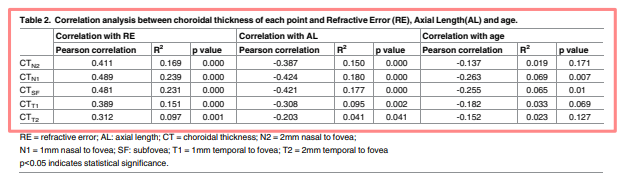

In [52]:
cor_RE = table['RE'] #sukuriame narius, kurie turėtų vien tik atitinkamo stulpelio vertes
cor_AL = table['AL']
cor_age = table['Age']
cor_N2 = table['N2']
cor_N1 = table['N1']
cor_SF = table['SF']
cor_T1 = table['T1']
cor_T2 = table['T2']

- Iš pradžių apskaičiuojame Pearsono koreliacijos reikšmes su RE, AL, age. Naudojame `pearson_r` funkciją.
- Tada skaičiuojam determinacijos koeficientą $R^2$, naudojam `np.corrcoef` ir jį pakeliame kvadratu.
- p vertes galima rasti naudojant `stats.pearsonr` ištraukiant antrą narį. p vertes taip pat galima rasti ir su `stats.ttest_rel`.
- Kai turim visus duomenis, sukuriame lentelę ir ją įdedame apskaičiuotas vertes.

### Pearson vertės su RE

In [53]:
def pearson_r(x, y):     #sukuriame funkciją, kuri paskui padės apskaičiuoti pearsono koreliacijos koeficientą
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)  #`np.corrcoef` parodo matricą koreliacijų : x su x, y su y, x su y, y su x

    # Return entry [0,1]
    return corr_mat[0,1] #nurodome, kad naudotų antrą narį matricoje

pn2 = pearson_r(cor_RE, cor_N2) #apskaičiuojame pearsono korealiacijas visiems CT duomenims
table_pn2 = round(pn2,3)
pn1 = pearson_r(cor_RE, cor_N1)
table_pn1 = round(pn1,3)

psf = pearson_r(cor_RE, cor_SF)
table_psf = round(psf,3)

pt1 = pearson_r(cor_RE, cor_T1)
table_pt1 = round(pt1,3)

pt2 = pearson_r(cor_RE, cor_T2)
table_pt2 = round(pt2,3)

Pear_RE = [table_pn2, table_pn1, table_psf, table_pt1, table_pt2]
Pear_RE #iš rezultatų matyti, kad beveik visi duomenys, išskyrus paskutinius, yra vidutinio laipsnio koreliacijos (~0.30-0.49)
        #paskutinių duomenų koeficiento vertė yra žemiau 0.29, tai rodo, kad koreliacija yra maža.


[0.302, 0.398, 0.416, 0.342, 0.26]

### R2 vertės su RE

In [54]:
correlation_matrix = np.corrcoef(cor_RE, cor_N2) # pearsono koef. pakeltas kvadratu yra R2, todėl jo funkcija pasinaudosim skaičiuojant R2
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2 #pakeliame koef. kvadratu
R2RN2=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_RE, cor_N1)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2RN1=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_RE, cor_SF)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2RSF=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_RE, cor_T1)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2RT1=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_RE, cor_T2)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2RT2=round(r_squared_R,3)

R2_RE= [R2RN2, R2RN1, R2RSF , R2RT1, R2RT2]
R2_RE

[0.091, 0.158, 0.173, 0.117, 0.068]

### p vertės su RE

In [55]:
p_Rn2 = stats.pearsonr(cor_RE, cor_N2) #stats.pearsonr taip pat skaičiuoja pearsono koef. ir parodo p vertę
p_Rn2 = round(p_Rn2[1],4)              #kadangi pvertė yra antras narys, ją gauname indeksuodami

p_Rn1 = stats.pearsonr(cor_RE, cor_N1)
p_Rn1 = round(p_Rn1[1],4)

p_Rsf = stats.pearsonr(cor_RE, cor_SF)
p_Rsf = round(p_Rsf[1],4)

p_Rt1 = stats.pearsonr(cor_RE, cor_T1)
p_Rt1 = round(p_Rt1[1],4)

p_Rt2 = stats.pearsonr(cor_RE, cor_T2)
p_Rt2 = round(p_Rt2[1],4)

pRE = [p_Rn2, p_Rn1, p_Rsf, p_Rt1, p_Rt2]
pRE

[0.0022, 0.0, 0.0, 0.0005, 0.009]

### Pearson vertės su AL

In [56]:
ppn2 = pearson_r(cor_AL, cor_N2) #visk1 kartojame su kitais duomenimis
table_ppn2 = round(ppn2,3)
ppn1 = pearson_r(cor_AL, cor_N1)
table_ppn1 = round(ppn1,3)
ppsf = pearson_r(cor_AL, cor_SF)
table_ppsf = round(ppsf,3)
ppt1 = pearson_r(cor_AL, cor_T1)
table_ppt1 = round(ppt1,3)
ppt2 = pearson_r(cor_AL, cor_T2)
table_ppt2 = round(ppt2,3)

Pear_AL = [table_ppn2, table_ppn1, table_ppsf,table_ppt1, table_ppt2]
Pear_AL #čia gauname neigiamą koreliaciją

[-0.377, -0.417, -0.408, -0.287, -0.171]

### R2 vertės su AL

In [57]:
correlation_matrix = np.corrcoef(cor_AL, cor_N2)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2AN2=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_AL, cor_N1)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2AN1=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_AL, cor_SF)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2ASF=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_AL, cor_T1)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2AT1=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_AL, cor_T2)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2AT2=round(r_squared_R,3)

R2_AL = [R2AN2, R2AN1, R2ASF, R2AT1, R2AT2]
R2_AL

[0.142, 0.173, 0.166, 0.082, 0.029]

### p vertės su AL

In [58]:
p_An2 = stats.pearsonr(cor_AL, cor_N2)
p_An2 = round(p_An2[1],4)

p_An1 = stats.pearsonr(cor_AL, cor_N1)
p_An1 = round(p_An1[1],4)

p_Asf = stats.pearsonr(cor_AL, cor_SF)
p_Asf = round(p_Asf[1],4)

p_At1 = stats.pearsonr(cor_AL, cor_T1)
p_At1 = round(p_At1[1],4)

p_At2 = stats.pearsonr(cor_AL, cor_T2)
p_At2 = round(p_At2[1],4)

pAL = [p_An2, p_An1, p_Asf, p_At1, p_At2]
pAL

[0.0001, 0.0, 0.0, 0.0038, 0.0884]

### Pearson vertės su age

In [59]:
pppn2 = pearson_r(cor_age, cor_N2)
table_pppn2 = round(pppn2,3)
pppn1 = pearson_r(cor_age, cor_N1)
table_pppn1 = round(pppn1,3)
pppsf = pearson_r(cor_age, cor_SF)
table_pppsf = round(pppsf,3)
pppt1 = pearson_r(cor_age, cor_T1)
table_pppt1 = round(pppt1,3)
pppt2 = pearson_r(cor_age, cor_T2)
table_pppt2 = round(pppt2,3)

Pear_age = [table_pppn2, table_pppn1, table_pppsf, table_pppt1, table_pppt2]
Pear_age

[-0.15, -0.277, -0.275, -0.209, -0.188]

### R2 vertės su age

In [60]:
correlation_matrix = np.corrcoef(cor_age, cor_N2)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2aN2=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_age, cor_N1)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2aN1=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_age, cor_SF)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2aSF=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_age, cor_T1)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2aT1=round(r_squared_R,3)

correlation_matrix = np.corrcoef(cor_age, cor_T2)
correlation_xy_R = correlation_matrix[0,1]
r_squared_R = correlation_xy_R**2
R2aT2=round(r_squared_R,3)

R2_age = [R2aN2, R2aN1, R2aSF, R2aT1, R2aT2]
R2_age

[0.023, 0.077, 0.076, 0.044, 0.035]

### p vertės su age

In [61]:
p_an2 = stats.pearsonr(cor_age, cor_N2)
p_an2 = round(p_an2[1],4)

p_an1 = stats.pearsonr(cor_age, cor_N1)
p_an1 = round(p_an1[1],4)

p_asf = stats.pearsonr(cor_age, cor_SF)
p_asf = round(p_asf[1],4)

p_at1 = stats.pearsonr(cor_age, cor_T1)
p_at1 = round(p_at1[1],4)

p_at2 = stats.pearsonr(cor_age, cor_T2)
p_at2 = round(p_at2[1],4)

page = [p_an2, p_an1, p_asf,p_at1,p_at2]
page

[0.1359, 0.0053, 0.0056, 0.0371, 0.0608]

In [62]:
col_names = pd.MultiIndex.from_product([["Correlation with RE", "Correlation with AL","Correlation with age"], #norint sukurt kelių "aukštų" lentelę naudojam
     ["Pearson correlation", "$R^2$", "p value"]])                                                             #pd.MultiIndex.from_product
table2 = pd.DataFrame(columns=col_names, index=['CT$_{n2}$','CT$_{n1}$','CT$_{sf}$','CT$_{t1}$','CT$_{t2}$']) #sukuriame tuščią lentelę, nurodome stulpelius ir indeksus
table2

Correlation with RE               Correlation with AL                \
          Pearson correlation $R^2$ p value Pearson correlation $R^2$ p value   
CT$_{n2}$                 NaN   NaN     NaN                 NaN   NaN     NaN   
CT$_{n1}$                 NaN   NaN     NaN                 NaN   NaN     NaN   
CT$_{sf}$                 NaN   NaN     NaN                 NaN   NaN     NaN   
CT$_{t1}$                 NaN   NaN     NaN                 NaN   NaN     NaN   
CT$_{t2}$                 NaN   NaN     NaN                 NaN   NaN     NaN   

          Correlation with age                
           Pearson correlation $R^2$ p value  
CT$_{n2}$                  NaN   NaN     NaN  
CT$_{n1}$                  NaN   NaN     NaN  
CT$_{sf}$                  NaN   NaN     NaN  
CT$_{t1}$                  NaN   NaN     NaN  
CT$_{t2}$                  NaN   NaN     NaN

In [63]:
table2.loc[:, ('Correlation with RE', 'Pearson correlation')] = Pear_RE #naudojant `loc`priskiriame duomenis atitinkamam stulpeliui
table2.loc[:, ('Correlation with RE', '$R^2$')] = R2_RE
table2.loc[:, ('Correlation with RE', 'p value')] = pRE

table2.loc[:, ('Correlation with AL', 'Pearson correlation')] = Pear_AL
table2.loc[:, ('Correlation with AL', '$R^2$')] = R2_AL
table2.loc[:, ('Correlation with AL', 'p value')] = pAL

table2.loc[:, ('Correlation with age', 'Pearson correlation')] = Pear_age
table2.loc[:, ('Correlation with age', '$R^2$')] = R2_age
table2.loc[:, ('Correlation with age', 'p value')] = page

table2

Correlation with RE                Correlation with AL         \
          Pearson correlation  $R^2$ p value Pearson correlation  $R^2$   
CT$_{n2}$               0.302  0.091  0.0022              -0.377  0.142   
CT$_{n1}$               0.398  0.158  0.0000              -0.417  0.173   
CT$_{sf}$               0.416  0.173  0.0000              -0.408  0.166   
CT$_{t1}$               0.342  0.117  0.0005              -0.287  0.082   
CT$_{t2}$               0.260  0.068  0.0090              -0.171  0.029   

                  Correlation with age                 
          p value  Pearson correlation  $R^2$ p value  
CT$_{n2}$  0.0001               -0.150  0.023  0.1359  
CT$_{n1}$  0.0000               -0.277  0.077  0.0053  
CT$_{sf}$  0.0000               -0.275  0.076  0.0056  
CT$_{t1}$  0.0038               -0.209  0.044  0.0371  
CT$_{t2}$  0.0884               -0.188  0.035  0.0608

#### Gauti duomenys skiriasi nuo straipsnyje esančių, nes nutariau, kad duomenys, kurių trūksta iškreiptų rezultatus ir juos išmečiau, nes negaliu sugalvoti duomenų apie akis ar interpoliuoti jų, nes jie per daug individualūs ir jei viena akis mato gerai, kita gali būt labai bloga ir atvirškčiai.

- Kuo mažesnis R2, tuo sunkiau numatyti priklausomą kintamąjį pagal nepriklausomą kintamąjį, o kuo R2 arčiau vieneto, tuo lengviau jį galime numatyt. Iš duomenų matyti, kad mažiausias R2 ties koreliacija pagal amžių, tai remiantis amžiumi sunku nusakyti, kokie galėtų būti tolimesni duomenys. 

- Pearsono koreliacija - tai tiesinio ryšio tarp dviejų atsitiktinių dydžių – X ir Y – matas. Jis varijuoja nuo -1 iki +1, o 0 reiškia, kad koreliacijos nėra (bet nevisada). Teigiama koreliacija rodo, kad didėja ir x, ir y. Neigiama koreliacija rodo, kad x didėja, o y mažėja. 

- Statistinio modelio p reikšmė yra tikimybė, kad kai nulinė hipotezė yra teisinga, statistinė suvestinė yra lygi arba didesnė už faktinius stebimus rezultatus.Nulinė hipotezė teigia, kad du išmatuoti reiškiniai neturi jokio ryšio vienas su kitu. Mažesnė p reikšmė turi didesnę reikšmę, nes ji gali pasakyti, kad hipotezė gali neteisingai paaiškinti stebėjimą. Jei viena ar kelios iš šių tikimybių yra mažesnės arba lygios α, reikšmingumo lygiui, nulinę hipotezę atmetame. Tikrosios nulinės hipotezės atveju p gali turėti bet kokią reikšmę nuo 0 iki 1 su vienoda tikimybe. Tikrosios alternatyvios hipotezės atveju p vertės gali būti arčiau 0.Kuo mažesnis p, tuo duomenys statistiškai reikšmingesni.

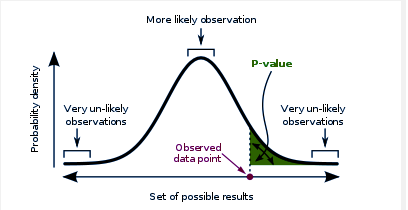

- T testai parodo, ar skaitinių duomenų imtis labai skiriasi nuo populiacijos. Kitaip tariant, tai suteikia mums skirtumo tarp populiacijų tikimybę. Jei norime patikrinti, kaip skiriasi skirtingais bandymais tos pačios grupės atliekame paired ttest.

---
>> **UŽDUOTIS**
>>
>> 3. Regresija
>>
>> a) Atkartoti lentelės nr 3 (Table 3. Multiple...) dalį. (Nereikia skaičiuoti $R^2  change$, nurodyti modelių $F$ ir $p$.)
>>
>> Straipsnyje autoriai atliko regresiją dviem žingsniais:
>>
>> - skaičiavo paprastą regresiją tarp 1 priklausomo ir 1 nepriklausomo kintamojo.
>> - skaičiavo daugialypę regresiją pridėdami dar vieną kintamąjį.
>>
>> Tuomet atliko statistinį modelių palyginimą (nereikia)
>>
>> - $multiple R$ yra šaknis iš $R^2$
>>

---

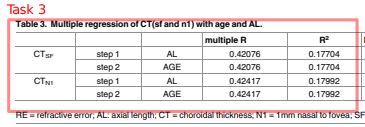

In [64]:
r2_al = [] #sukuriam tuščią sąrašą, kuriame bus talpinamos R2 vertės
def R2(formula, data): #sukuriame funkciją, kuri padės apskaičiuoti R2
    fit = smf.ols(formula, data=data).fit() 
    formate = '{:.3f}'.format(fit.rsquared)
    r2_al.append(formate)
alsf = R2('cor_SF ~ cor_AL',cor_SF)
alsf = R2('cor_SF ~ cor_AL+cor_age', cor_SF)
aln1 = R2('cor_N1 ~ cor_AL',cor_N1)
aln1 = R2('cor_N1 ~ cor_AL+cor_age', cor_N1)

mulal = np.sqrt(float(r2_al[0])) #multiple R gaunamas iš R2 ištraukiant šaknį
mulag = np.sqrt(float(r2_al[1])) #iš sąrašo išsitraukiam po vieną narį, pasiverčiam jį skaičiumi ir ištraukiam šaknį
muln = np.sqrt(float(r2_al[2]))
muln1 = np.sqrt(float(r2_al[3]))



In [65]:
col_na = pd.MultiIndex.from_product([["Table 3. Multiple of CT$_{sf and  n1}$ with age and AL"],['.','','multiple R','$R^2$']]) #kartojam žingsnius iš antros užduoties
table3 = pd.DataFrame(columns=col_na, index=['$CT_{SF}$','','$CT_{N1}$',''])

In [66]:
table3.loc[:, ('Table 3. Multiple of CT$_{sf and  n1}$ with age and AL', '.')] = ['step 1','step 2','step 1','step 2']
table3.loc[:, ('Table 3. Multiple of CT$_{sf and  n1}$ with age and AL', '')] = ['AL','AGE','AL','AGE']
table3.loc[:, ('Table 3. Multiple of CT$_{sf and  n1}$ with age and AL', 'multiple R')] = [mulal, mulag, muln, muln1]
table3.loc[:, ('Table 3. Multiple of CT$_{sf and  n1}$ with age and AL', '$R^2$')] = r2_al

In [67]:
table3 #lentelė su išmestais duomenimis


Table 3. Multiple of CT$_{sf and  n1}$ with age and AL       \
                                                               .        
$CT_{SF}$                                             step 1       AL   
                                                      step 2      AGE   
$CT_{N1}$                                             step 1       AL   
                                                      step 2      AGE   

                             
          multiple R  $R^2$  
$CT_{SF}$   0.407431  0.166  
            0.408656  0.167  
$CT_{N1}$   0.415933  0.173  
            0.417133  0.174

Galvojau gali išeiti ir naudojant `np.corrcoef`, bet nepavyko apskaičiuoti age teisingai

#### multiple R ir R2 CT(SF) su AL ir AL+AGE

In [68]:
correlation_matrixa = np.corrcoef(cor_AL, cor_SF) #step 1 SF
correlation_xy_Ra = correlation_matrixa[0,1]
r_squared_Ra = correlation_xy_Ra**2
multipleRa = np.sqrt(r_squared_Ra)
R_mult_AL_sf = round(multipleRa,3)
r_sq_AL_sf = round(r_squared_Ra,3)

AL_AGE = cor_AL + cor_age
al_age = cor_SF*2
correlation_matrixc = np.corrcoef(cor_AL+cor_age,cor_N1) #step 2 SF
correlation_xy_Rc = correlation_matrixc[0,1]
r_squared_Rc = correlation_xy_Rc**2
multipleRc = np.sqrt(r_squared_Rc)
R_mult_age_sf = round(multipleRc,3)
r_sq_age_sf = round(r_squared_Rc,3)

R_mult_AL_sf,r_sq_AL_sf,R_mult_age_sf,r_sq_age_sf

(0.408, 0.166, 0.347, 0.12)

#### multiple R ir R2 CT(N1) su AL ir AL+AGE 

In [69]:
correlation_matrixb = np.corrcoef(cor_AL, cor_N1) #step 1 N1
correlation_xy_Rb = correlation_matrixb[0,1]
r_squared_Rb = correlation_xy_Rb**2
multipleRb = np.sqrt(r_squared_Rb)
R_mult_AL_n1 = round(multipleRb,3)
r_sq_AL_n1 = round(r_squared_Rb,3)

N1_AGE = cor_age + cor_AL
correlation_matrixd = np.corrcoef(N1_AGE, cor_N1) #step 2 N1
correlation_xy_Rd = correlation_matrixd[0,1]
r_squared_Rd = correlation_xy_Rd**2
multipleRd = np.sqrt(r_squared_Rd)
R_mult_age_n1 = round(multipleRd,3)
r_sq_age_n1 = round(r_squared_Rd,3)

R_mult_AL_n1,r_sq_AL_n1,R_mult_age_n1,r_sq_age_n1


(0.417, 0.173, 0.347, 0.12)

---
>> **UŽDUOTIS**
>>
>> 4. Regresijos grafikai
>>
>> a) Atkartoti grafiką Fig 2
>>
>> b) Atkartoti grafiką Fig 3
>>
---

## 4 užduoties a dalis

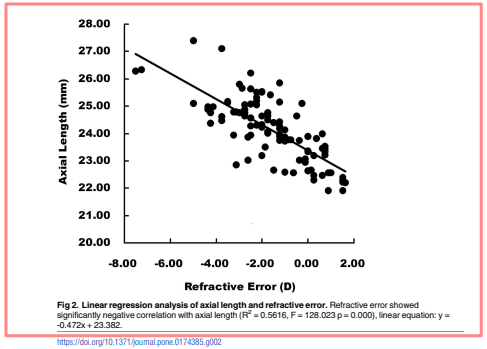

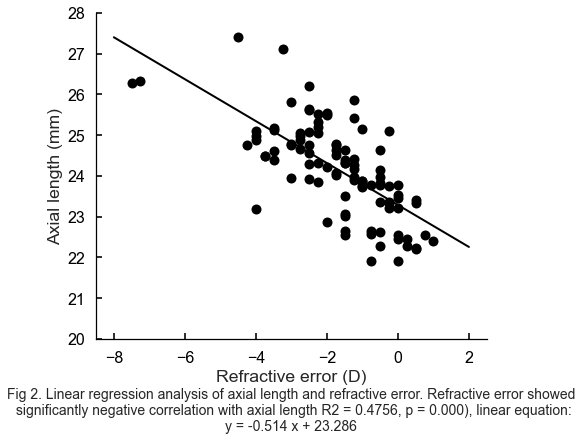

In [70]:
fig = plt.figure(figsize=(7, 6)) #Nurodome figūros dydį
ax = plt.axes()
ax.set_facecolor('white') #Panaikiname pilką foną
plt.plot(cor_RE, cor_AL, marker='.', markersize=20,markerfacecolor='black', linestyle='none')
plt.xlabel('percent RE') #pavadiname ašis
plt.ylabel('AL')
plt.ylim(ymax = 28, ymin = 20)
plt.grid(False)
plt.xticks([-8,-6,-4,-2,0,2]) #Padarome x ašies tikcs su `plt.xtikcs`
plt.yticks([20,21,22,23,24,25,26,27,28]) #Padarome y ašies tikcs su `plt.ytikcs`
ax.tick_params(colors='black',left ='on',direction='in')    #nurodome, kad ticks būtų nukreipti į vidų, spalva juoda
ax.tick_params(colors='black', bottom='on',direction='in')  #tick bus ant kairės ir apatinės ašies
color_name='black'
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)

a, b = np.polyfit(cor_RE,cor_AL,1) #sukuriame tiesinę regresiją naudojant `np.polyfit()`: a,b

# Make theoretical line to plot
x = np.array([-8,2])
y = a * x + b

# Add regression line to your plot
plt.plot(x, y,'black', lw=2)
plt.xlabel('Refractive error (D)')
plt.ylabel('Axial length (mm)')
plt.title('Fig 2. Linear regression analysis of axial length and refractive error. Refractive error showed\n significantly negative correlation with axial length R2 = 0.4756, p = 0.000), linear equation:\ny = -0.514 x + 23.286', y=-0.3, fontsize=14)
# Draw the plot
plt.show()
#šis grafikas rodo neigiamą koreliaciją, nes x didėja, o y mažėja

In [71]:
print('y =', round(a,3),'x','+',round(b,3)) #surandame tiesinę funkciją


y = -0.514 x + 23.286


In [72]:
correlation_matrix = np.corrcoef(cor_RE, cor_AL) #randame R2
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
round(r_squared,4)

0.4756

In [73]:
pp = stats.pearsonr(cor_RE, cor_AL) #randame p
tt = (round(pp[0],3),round(pp[1], 3))
tt

(-0.69, 0.0)

## 4 užduoties b dalis

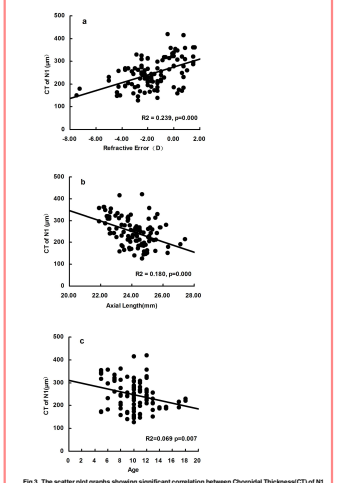

In [74]:
cor_RE = table['RE']
cor_AL = table['AL']
cor_age = table['Age']
cor_N2 = table['N2']
cor_N1 = table['N1']
cor_SF = table['SF']
cor_T1 = table['T1']
cor_T2 = table['T2']

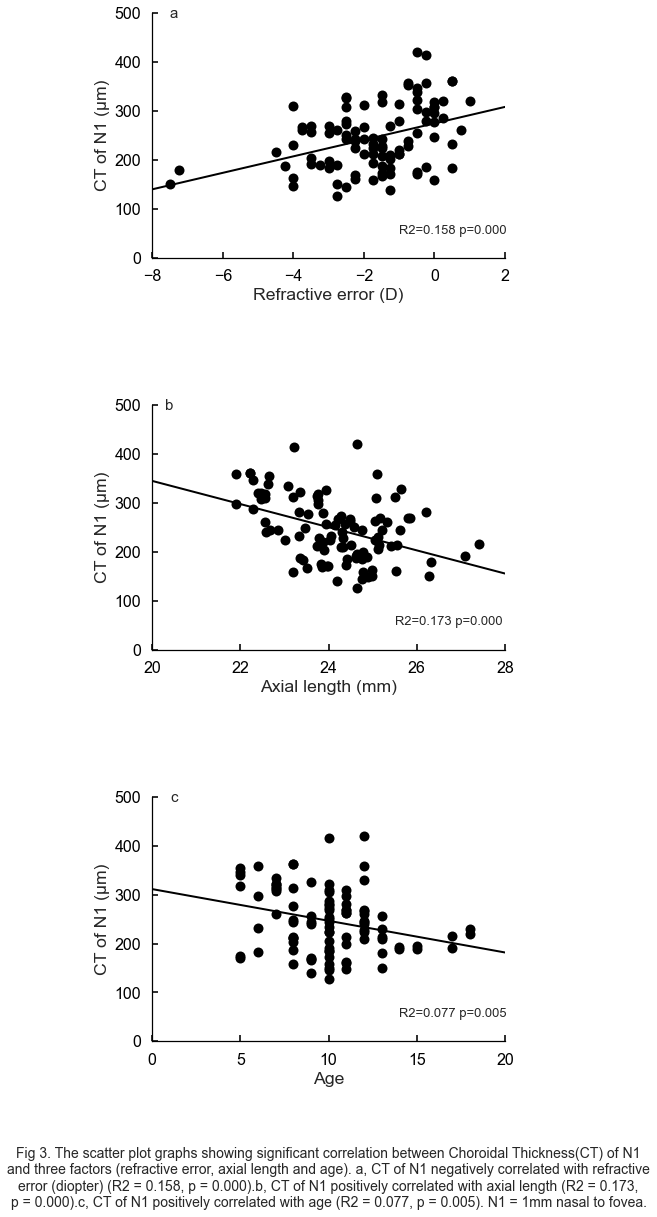

In [80]:

fig, axs = plt.subplots(3, 1,figsize=(7, 12)) #trims grafikams nubraižyti vienu metu naudojame `plt.subplots`
ax = axs[0]
ax.grid(False)
ax.set_xlim([-8,2]) #nurodom, kokio ilgio bus x ašis
ax.set_facecolor('white') #Panaikiname pilką foną
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.tick_params(colors='black',left ='on',direction='in')    
ax.tick_params(colors='black', bottom='on',direction='in')
ax.set_ylim([0, 500])
ax.plot(cor_RE, cor_N1, marker='.', markersize=20,markerfacecolor='black', linestyle='none')#nubraižmoe N1 priklausomybę nuo RE
a11, b11 = np.polyfit(cor_RE,cor_N1,1) #sukuriame tiesinę regresiją naudojant `np.polyfit()`
x11 = np.array([-8,2])
y11 = a11 * x11 + b11
ax.plot(x11, y11,'black', lw=2)
ax.set_xlabel('Refractive error (D)') #pavadiname ašis
ax.set_ylabel('CT of N1 (μm)')
ax.text(-1, 50, 'R2=0.158 p=0.000', fontsize=13)
ax.text(-7.5, 490, 'a', fontsize=15)


ax = axs[1]
ax.grid(False)
ax.set_xlim([20,28])
ax.set_facecolor('white')
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.tick_params(colors='black',left ='on',direction='in')    
ax.tick_params(colors='black', bottom='on',direction='in')
ax.set_ylim([0, 500])
ax.plot(cor_AL, cor_N1, marker='.', markersize=20,markerfacecolor='black', linestyle='none')#nubraižmoe N1 priklausomybę nuo AL
a22, b22 = np.polyfit(cor_AL,cor_N1,1) #sukuriame tiesinę regresiją naudojant `np.polyfit()`
x22 = np.array([20,28])
y22 = a22 * x22 + b22 
ax.plot(x22, y22,'black', lw=2)
ax.set_xlabel('Axial length (mm)') #pavadiname ašis
ax.set_ylabel('CT of N1 (μm)')
ax.text(25.5, 50, 'R2=0.173 p=0.000', fontsize=13)
ax.text(20.3, 490, 'b', fontsize=15) 

ax = axs[2]
ax.grid(False)
ax.set_xlim([0,20])
ax.set_facecolor('white')
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.tick_params(colors='black',left ='on',direction='in')    
ax.tick_params(colors='black', bottom='on',direction='in')
ax.set_ylim([0, 500])
ax.plot(cor_age, cor_N1, marker='.', markersize=20,markerfacecolor='black', linestyle='none') #nubraižmoe N1 priklausomybę nuo age
a33, b33 = np.polyfit(cor_age,cor_N1,1) #sukuriame tiesinę regresiją naudojant `np.polyfit()`: a,b
x33 = np.array([0,20])
y33 = a33 * x33 + b33
ax.plot(x33, y33,'black', lw=2)
ax.set_xlabel('Age') #pavadiname ašis
ax.set_ylabel('CT of N1 (μm)');
ax.text(14, 50, 'R2=0.077 p=0.005', fontsize=13)
ax.text(1, 490, 'c', fontsize=15)


fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.8, top=1.2, wspace=None, hspace=0.6)
plt.title(f'Fig 3. The scatter plot graphs showing significant correlation between Choroidal Thickness(CT) of N1\nand three factors (refractive error, axial length and age). a, CT of N1 negatively correlated with refractive\nerror (diopter) (R2 = {RRE}, p = 0.000).b, CT of N1 positively correlated with axial length (R2 = {RAL},\np = 0.000).c, CT of N1 positively correlated with age (R2 = {Rage}, p = 0.005). N1 = 1mm nasal to fovea.',y=-0.7,fontsize=14);


In [78]:
RN1=stats.pearsonr(cor_RE, cor_N1) #apskaičiuojam p vertes, pasižiūrim pearsono koef.
AN1=stats.pearsonr(cor_AL, cor_N1)
aN1=stats.pearsonr(cor_age, cor_N1)
RN1, AN1, aN1

((0.39765720861180753, 4.1879614967945094e-05),
 (-0.4165278433445083, 1.628895408356339e-05),
 (-0.27706409201952076, 0.0052600641233099795))

In [79]:
correlation_matrix = np.corrcoef(cor_RE, cor_N1) #apskaičiuojame R2,naudojam tas pačias funkcijas kaip aukščiau
correlation_xy1 = correlation_matrix[0,1]
r_squared1 = correlation_xy1**2
RRE=round(r_squared1,3)

correlation_matrix = np.corrcoef(cor_AL, cor_N1)
correlation_xy2 = correlation_matrix[0,1]
r_squared2 = correlation_xy2**2
RAL=round(r_squared2,3)

correlation_matrix = np.corrcoef(cor_age, cor_N1)
correlation_xy3 = correlation_matrix[0,1]
r_squared3 = correlation_xy3**2
Rage=round(r_squared3,3)
RRE, RAL, Rage


(0.158, 0.173, 0.077)

---
>> **UŽDUOTIS**
>>
>> 5. Duomenų valymas
>>
>> Nuskaityti failą 'Shao2017_unclean.xlsx' ir sutvarkyti naudojant python.
>>
>> Sutvarkytų duomenų pavyzdys - prieš tai analizuotas Shao2017_Correlation_of_choroidal_thickness.csv
>>
---

- Pradžioje reikia importuoti duomenis.
- Norint importuoti, pirma susirandam, kur yra mūsų failas:
     - `os.path.expanduser('~')` naudojame, kad patektume į namų direktoriją.
     - `os.path.join` padeda sukurti kelią iki mūsų failo.
- Norint atidaryti failą naudojame pandas pakuotę, `pd.read_excel()`.
- Papildomai reikia nurodyti `pd.read_excel()`, kad:
    - `index_col` nurodo, kad stulpeliai bus naudojami, kaip eilučių pavadinimai, pateikiami kaip str vardas arba kaip stulpelio indeksas.
    - reikia praleisti 3 eilutes, tam naudojam `skiprows`, nes tik po 3 eilutės prasideda reikalingi duomenys.
- Panaikiname nereikalingus simbolius, naudojant `str.replace`

In [81]:
direktorija1 = os.path.expanduser("~")
failas_netvar = os.path.join(direktorija1,'Desktop','programavimas','biod2021','exam','K3','Shao2017_unclean.xlsx')
cleaning_file = pd.read_excel(failas_netvar,index_col=None, skiprows = 3)

cleaning_file['Axial length'] = cleaning_file['Axial length'].str.replace('mm','')
cleaning_file

SEX  AGE (years) OD/OS    DS    DC   axis  spherical equivalence  \
0      male            8    od  0.00  1.25   95.0                  0.625   
1       NaN            8    os  0.00  1.50   80.0                  0.750   
2       fem           13    od -3.50 -1.50    5.0                 -4.250   
3       NaN           13    os -4.00 -2.00  175.0                 -5.000   
4      male           10    od -0.25  0.50   75.0                  0.000   
..      ...          ...   ...   ...   ...    ...                    ...   
107     NaN            9    os   NaN  0.50   90.0                 -2.750   
108  female            9    od   NaN  1.75   80.0                 -2.750   
109     NaN            9    os   NaN  1.50  100.0                  0.250   
110  female            5    od   NaN   NaN    NaN                 -2.750   
111     NaN            5    os   NaN   NaN    NaN                 -2.750   

     CORRECTED VA Axial length  
0             1.0       23.46   
1             1.0       23.53   
2             0.8       24.38   
3             0.8       25.11   
4             1.0       23.33   
..            ...          ...  
107           1.0          NaN  
108           1.0          NaN  
109           1.0          NaN  
110           1.0          NaN  
111           1.0          NaN  

[112 rows x 9 columns]

- Užpildyti trūkstamas vertes galima naudojant `ffill` arba `pad` metodą (tarpusavyje jie nesiskiria, bent šituos atveju)

In [101]:
table_clean = cleaning_file.fillna(value=None, method='ffill', axis=None, inplace=False, limit=None, downcast=None)

In [108]:
table_clean

SEX  AGE (years) OD/OS    DS    DC   axis  spherical equivalence  \
0      male            8    od  0.00  1.25   95.0                  0.625   
1      male            8    os  0.00  1.50   80.0                  0.750   
2       fem           13    od -3.50 -1.50    5.0                 -4.250   
3       fem           13    os -4.00 -2.00  175.0                 -5.000   
4      male           10    od -0.25  0.50   75.0                  0.000   
..      ...          ...   ...   ...   ...    ...                    ...   
107  female            9    os -2.50  0.50   90.0                 -2.750   
108  female            9    od -2.50  1.75   80.0                 -2.750   
109  female            9    os -2.50  1.50  100.0                  0.250   
110  female            5    od -2.50  1.50  100.0                 -2.750   
111  female            5    os -2.50  1.50  100.0                 -2.750   

     CORRECTED VA Axial length  
0             1.0       23.46   
1             1.0       23.53   
2             0.8       24.38   
3             0.8       25.11   
4             1.0       23.33   
..            ...          ...  
107           1.0       24.75   
108           1.0       24.75   
109           1.0       24.75   
110           1.0       24.75   
111           1.0       24.75   

[112 rows x 9 columns]

In [107]:
table_clean2 = cleaning_file.fillna(value=None, method='pad', axis=None, inplace=False, limit=None, downcast=None)
table_clean2

SEX  AGE (years) OD/OS    DS    DC   axis  spherical equivalence  \
0      male            8    od  0.00  1.25   95.0                  0.625   
1      male            8    os  0.00  1.50   80.0                  0.750   
2       fem           13    od -3.50 -1.50    5.0                 -4.250   
3       fem           13    os -4.00 -2.00  175.0                 -5.000   
4      male           10    od -0.25  0.50   75.0                  0.000   
..      ...          ...   ...   ...   ...    ...                    ...   
107  female            9    os -2.50  0.50   90.0                 -2.750   
108  female            9    od -2.50  1.75   80.0                 -2.750   
109  female            9    os -2.50  1.50  100.0                  0.250   
110  female            5    od -2.50  1.50  100.0                 -2.750   
111  female            5    os -2.50  1.50  100.0                 -2.750   

     CORRECTED VA Axial length  
0             1.0       23.46   
1             1.0       23.53   
2             0.8       24.38   
3             0.8       25.11   
4             1.0       23.33   
..            ...          ...  
107           1.0       24.75   
108           1.0       24.75   
109           1.0       24.75   
110           1.0       24.75   
111           1.0       24.75   

[112 rows x 9 columns]